In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time 

from unityagents import UnityEnvironment
from model import Agent
from tqdm import tqdm

plt.style.use('ggplot')

# Notebook for Testing
## Recreating the provided example 

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [5]:
# env_info = env.reset(train_mode=False)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

In [6]:
# env.close()

# Test Training 

In [7]:
def train_agent(agent, n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, windows=[10, 100], plot=True, max_t=1000):
    """
    Training the agent
    """
    scores = []
    avg_score = -np.inf
    max_avg_score = -np.inf
    eps = eps_start
    start = time.perf_counter()

    win1, win2 = windows

    for i in range(n_episodes):
        info = env.reset(train_mode=True)[brain_name]
        state = info.vector_observations[0]
        score = 0 

        while True:
            action = agent.act(state, eps)            
            info = env.step(action)[brain_name]
            
            next_state = info.vector_observations[0]
            reward = info.rewards[0]
            done = info.local_done[0]
            score += reward
            
            agent.step(state, action, reward, next_state, done)

            state = next_state

            if done:
                break 

        scores.append(score)
        eps = max(eps_end, eps_decay*eps)

        if len(scores) > 99:
            avg_score = np.mean(scores[-100:])
            max_avg_score = max(avg_score, max_avg_score)
            
        now = time.perf_counter() - start
        print(f"\r{int(now/60):02d}:{int(now%60):02d} Episode {i+1}/{n_episodes}, Max Avg: {max_avg_score:.4f}, Avg: {avg_score:.4f}, Epsilon: {eps:.4f}", end="")
        
        if avg_score > 14:
            print(f"\r{int(now/60):02d}:{int(now%60):02d} Success, avg score of {avg_score:.2f} after {i} episodes")
            break 
            
    if plot:
        avg_1 = [np.nan for _ in range(win1 - 1)]
        avg_2 = [np.nan for _ in range(win2 - 1)]

        for i in range(len(scores) - win1 + 1):
            avg_1.append(np.mean(scores[i:i+win1]))

        for i in range(len(scores) - win2 + 1):
            avg_2.append(np.mean(scores[i:i+win2]))

        plt.plot(scores, label="Individual")
        plt.plot(avg_1, label=f"Avg_Window = {win1}")
        plt.plot(avg_2, label=f"Avg_window = {win2}")
        plt.xlabel("episode")
        plt.ylabel("score")
        plt.legend()
        plt.show()

    return max_avg_score, avg_score

## Testing NN Structures 

In [8]:
max_means = {}
last_means = {}
samples = 3
epis = 500

04:54 Episode 500/500, Max Avg: 12.2000, Avg: 12.1900, Epsilon: 0.0816

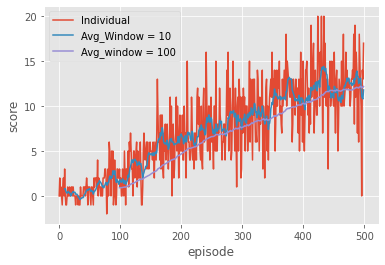

04:54 Episode 500/500, Max Avg: 12.2300, Avg: 12.1300, Epsilon: 0.0816

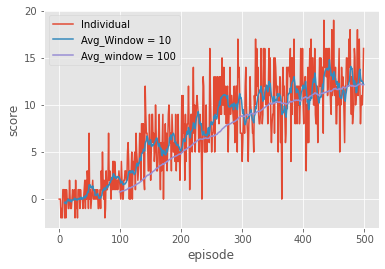

04:55 Episode 500/500, Max Avg: 12.9900, Avg: 12.9700, Epsilon: 0.0816

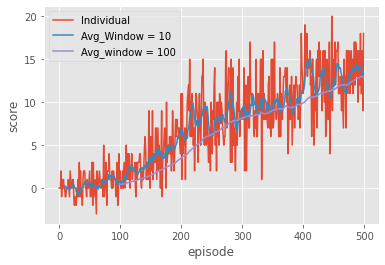

In [9]:
maxs = []
lsts = []
for _ in range(samples):
    agent = Agent(state_size, action_size, [64])
    out = train_agent(agent, n_episodes=epis)
    maxs.append(out[0])
    lsts.append(out[1])
    
max_means[6] = maxs 
last_means[6] = lsts 

05:12 Episode 500/500, Max Avg: 12.8100, Avg: 12.8100, Epsilon: 0.0816

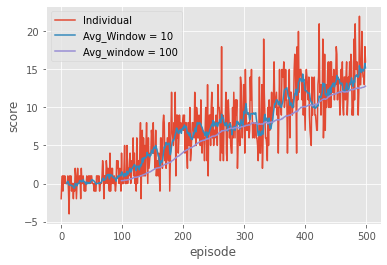

05:10 Episode 500/500, Max Avg: 12.5700, Avg: 12.5700, Epsilon: 0.0816

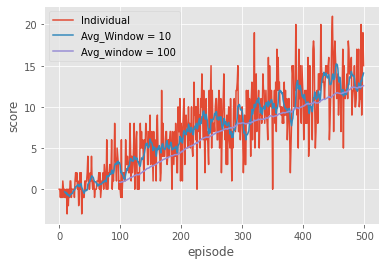

05:10 Episode 500/500, Max Avg: 13.1300, Avg: 13.1100, Epsilon: 0.0816

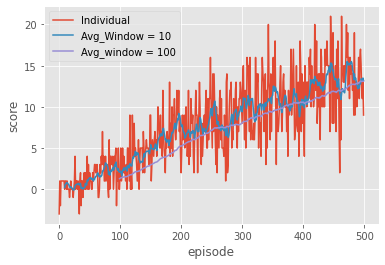

In [10]:
maxs = []
lsts = []
for _ in range(samples):
    agent = Agent(state_size, action_size, [64, 64])
    out = train_agent(agent, n_episodes=epis)
    maxs.append(out[0])
    lsts.append(out[1])
    
max_means[66] = maxs 
last_means[66] = lsts

05:13 Episode 500/500, Max Avg: 6.0300, Avg: 5.9900, Epsilon: 0.0816

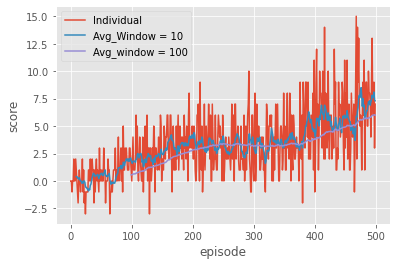

05:14 Episode 500/500, Max Avg: 4.4700, Avg: 4.4700, Epsilon: 0.0816

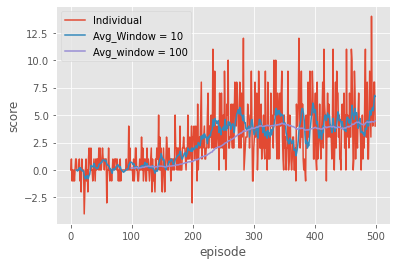

05:14 Episode 500/500, Max Avg: 0.5800, Avg: 0.4600, Epsilon: 0.081607

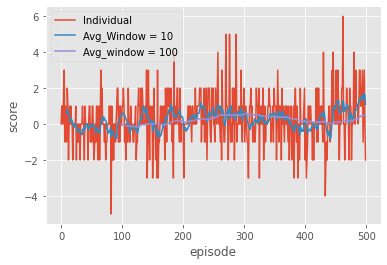

In [11]:
maxs = []
lsts = []
for _ in range(samples):
    agent = Agent(state_size, action_size, [4, 4, 4])
    out = train_agent(agent, n_episodes=epis)
    maxs.append(out[0])
    lsts.append(out[1])
    
max_means[444] = maxs 
last_means[444] = lsts 

05:34 Episode 500/500, Max Avg: 13.3500, Avg: 13.2800, Epsilon: 0.0816

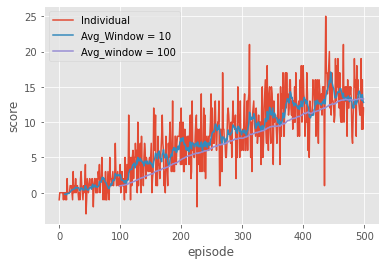

05:31 Episode 500/500, Max Avg: 13.3200, Avg: 13.3200, Epsilon: 0.0816

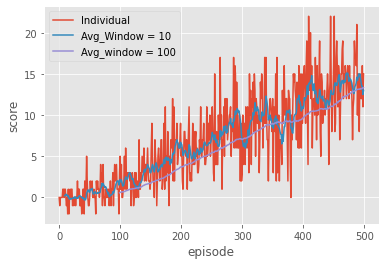

05:29 Episode 500/500, Max Avg: 12.3300, Avg: 12.2600, Epsilon: 0.0816

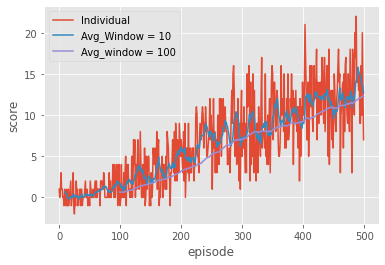

In [12]:
maxs = []
lsts = []
for _ in range(samples):
    agent = Agent(state_size, action_size, [64, 64, 64])
    out = train_agent(agent, n_episodes=epis)
    maxs.append(out[0])
    lsts.append(out[1])
    
max_means[666] = maxs 
last_means[666] = lsts 

05:22 Episode 500/500, Max Avg: 13.7000, Avg: 13.6100, Epsilon: 0.0816

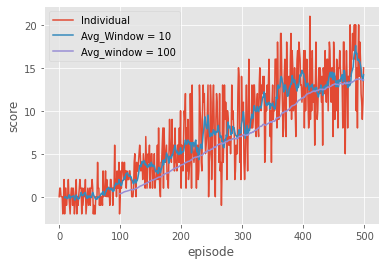

05:22 Episode 500/500, Max Avg: 12.4400, Avg: 12.4400, Epsilon: 0.0816

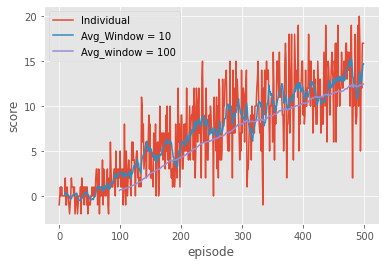

05:24 Episode 500/500, Max Avg: 11.1800, Avg: 11.1500, Epsilon: 0.0816

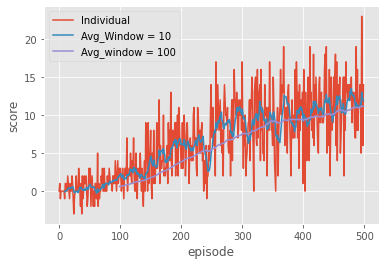

In [13]:
maxs = []
lsts = []
for _ in range(samples):
    agent = Agent(state_size, action_size, [64, 32, 16])
    out = train_agent(agent, n_episodes=epis)
    maxs.append(out[0])
    lsts.append(out[1])

max_means[631] = maxs 
last_means[631] = lsts

In [14]:
print(max_means, "\n", last_means)

{6: [12.2, 12.23, 12.99], 66: [12.81, 12.57, 13.13], 444: [6.03, 4.47, 0.58], 666: [13.35, 13.32, 12.33], 631: [13.7, 12.44, 11.18]} 
 {6: [12.19, 12.13, 12.97], 66: [12.81, 12.57, 13.11], 444: [5.99, 4.47, 0.46], 666: [13.28, 13.32, 12.26], 631: [13.61, 12.44, 11.15]}


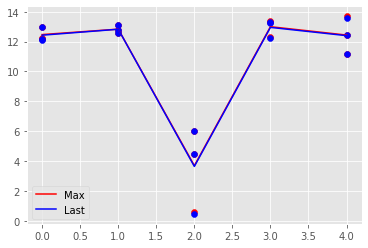

In [15]:
cheat_x = []

for i in range(5):
    cheat_x = cheat_x + [i]*samples
    
plt.plot([np.mean(vals) for vals in max_means.values()], label="Max", color="r")
plt.plot([np.mean(vals) for vals in last_means.values()], label="Last", color="b")
plt.scatter(cheat_x, [i for j in max_means.values() for i in j], color="r")
plt.scatter(cheat_x, [i for j in last_means.values() for i in j], color="b")
plt.legend()

In [8]:
# All about the same, choosing seemingly reasonable one for now 
best_struc = [64, 64]

## Epsilon Tests 
Using single 64 neuron hidden layer

In [17]:
decays = [0.99, 0.995, 0.9975, 0.999]
maxs = []
avgs = []
loops = 3

for rate in decays:
    tmp_m = []
    tmp_a = []

    for i in range(loops):
        agent = Agent(state_size, action_size, best_struc)
        outs = train_agent(agent, n_episodes=1000, eps_decay=rate, plot=False)
        tmp_m.append(outs[0])
        tmp_a.append(outs[1])

    maxs.append(tmp_m)
    avgs.append(tmp_a)

04:52 Episode 459/1000, Max Avg: 14.0200, Avg: 14.0200, Epsilon: 0.0100Success, avg score of 14.02 after 458 episodes
04:38 Episode 442/1000, Max Avg: 14.0300, Avg: 14.0300, Epsilon: 0.0118Success, avg score of 14.03 after 441 episodes
04:32 Episode 433/1000, Max Avg: 14.0800, Avg: 14.0800, Epsilon: 0.0129Success, avg score of 14.08 after 432 episodes
05:59 Episode 568/1000, Max Avg: 14.0400, Avg: 14.0400, Epsilon: 0.0580Success, avg score of 14.04 after 567 episodes
07:01 Episode 665/1000, Max Avg: 14.0100, Avg: 14.0100, Epsilon: 0.0357Success, avg score of 14.01 after 664 episodes
05:36 Episode 527/1000, Max Avg: 14.0300, Avg: 14.0300, Epsilon: 0.0712Success, avg score of 14.03 after 526 episodes
10:25 Episode 974/1000, Max Avg: 14.0200, Avg: 14.0200, Epsilon: 0.0873Success, avg score of 14.02 after 973 episodes
10:12 Episode 952/1000, Max Avg: 14.0200, Avg: 14.0200, Epsilon: 0.0923Success, avg score of 14.02 after 951 episodes
10:40 Episode 1000/1000, Max Avg: 8.5300, Avg: 8.5200, E

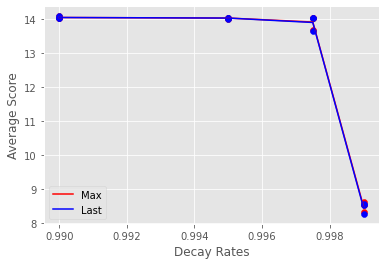

In [18]:
x = []
for i in range(len(decays)):
    x = x + [decays[i]]*loops

plt.plot(decays, [np.mean(vals) for vals in maxs], label="Max", color="r")
plt.plot(decays, [np.mean(vals) for vals in avgs], label="Last", color="b")
plt.scatter(x, [i for j in maxs for i in j], color="r")
plt.scatter(x, [i for j in avgs for i in j], color="b")

plt.xlabel("Decay Rates")
plt.ylabel("Average Score")
plt.legend();

## Param Testing
NOTE: Not repeated after fixes, not necesary 
### $\gamma$ and $\tau$

In [9]:
# Vaguely select best eps decay cus I'm going to bed
best_dec = 0.995

Gamma: 0.9, Tau: 0.0001
05:38 Episode 500/500, Max Avg: 1.1500, Avg: 0.9400, Epsilon: 0.0816

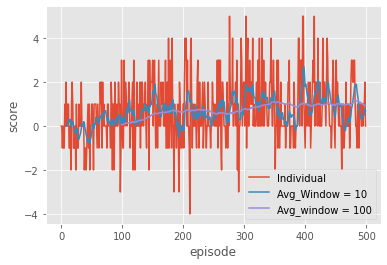



Gamma: 0.9, Tau: 0.01
05:29 Episode 500/500, Max Avg: 12.3900, Avg: 12.3900, Epsilon: 0.0816

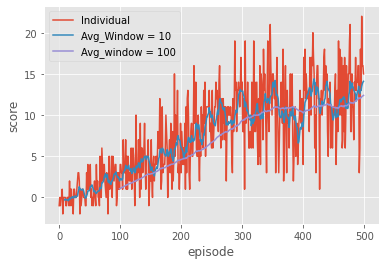



Gamma: 0.9, Tau: 0.1
05:30 Episode 500/500, Max Avg: 12.3300, Avg: 12.3100, Epsilon: 0.0816

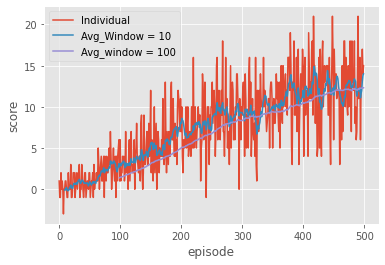



Gamma: 0.99, Tau: 0.0001
05:23 Episode 500/500, Max Avg: 0.8100, Avg: 0.6800, Epsilon: 0.0816

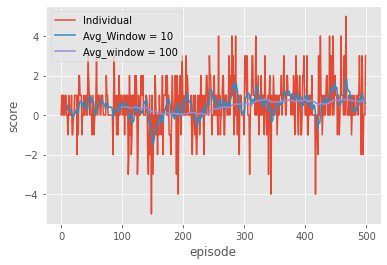



Gamma: 0.99, Tau: 0.01
05:29 Episode 500/500, Max Avg: 11.3500, Avg: 11.3300, Epsilon: 0.0816

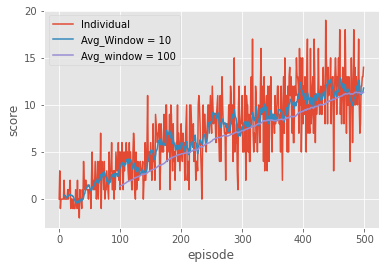



Gamma: 0.99, Tau: 0.1
05:23 Episode 500/500, Max Avg: 10.5200, Avg: 10.5200, Epsilon: 0.0816

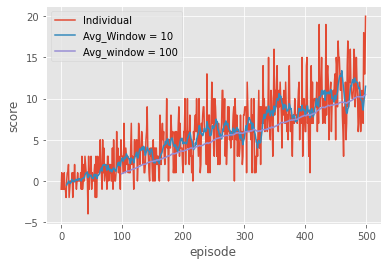



Gamma: 0.999, Tau: 0.0001
05:16 Episode 500/500, Max Avg: 2.0700, Avg: 1.9700, Epsilon: 0.081620

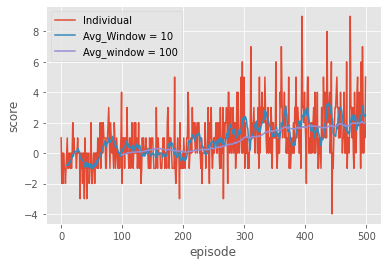



Gamma: 0.999, Tau: 0.01
05:12 Episode 500/500, Max Avg: 7.7200, Avg: 7.5600, Epsilon: 0.0816

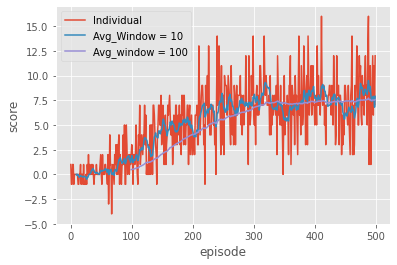



Gamma: 0.999, Tau: 0.1
05:10 Episode 500/500, Max Avg: 0.4700, Avg: 0.4100, Epsilon: 0.081607

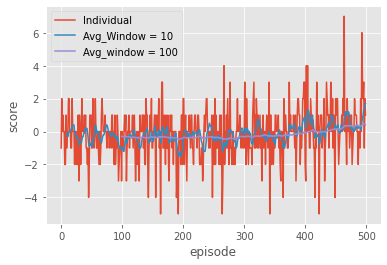



Max:
 [[ 1.15 12.39 12.33]
 [ 0.81 11.35 10.52]
 [ 2.07  7.72  0.47]]
Last:
 [[ 0.94 12.39 12.31]
 [ 0.68 11.33 10.52]
 [ 1.97  7.56  0.41]]


In [10]:
gams = [0.9, 0.99, 0.999]
taus = [0.0001, 0.01, 0.1]

max_outs = np.zeros([len(gams), len(taus)])
lst_outs = np.zeros([len(gams), len(taus)])

for g_index, g in enumerate(gams):
    for t_index, t in enumerate(taus):
        print(f"Gamma: {g}, Tau: {t}")
        agent = Agent(state_size, action_size, best_struc, gamma=g, tau=t)
        outs = train_agent(agent, n_episodes=500, eps_decay=best_dec)
        print("\n")
        
        max_outs[g_index, t_index] = outs[0]
        lst_outs[g_index, t_index] = outs[1]

print("Max:\n", max_outs)
print("Last:\n", lst_outs)

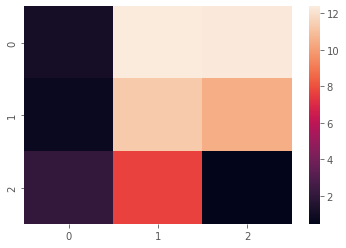

In [15]:
sns.heatmap(max_outs);

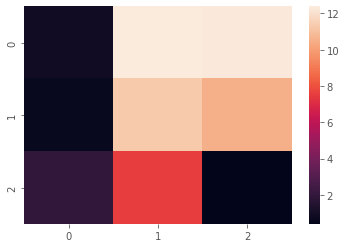

In [16]:
sns.heatmap(lst_outs);